Data Dictionary

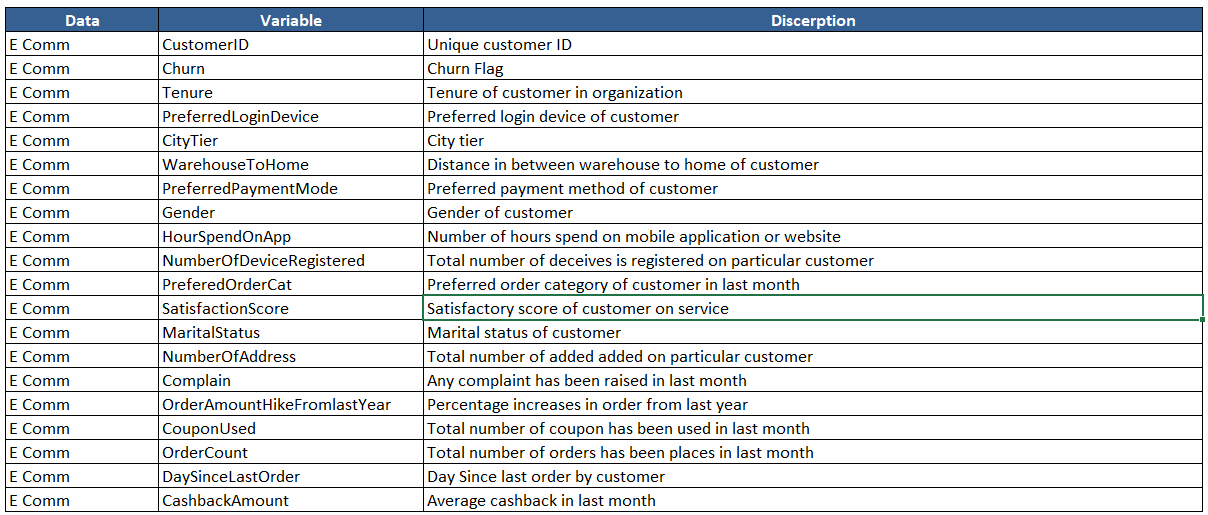

## **1. Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

##**2. Dataset overview**

In [ ]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print("Columns: ", df.columns)
print("Missing values: ", df.isnull().sum())

Number of rows:  5630
Number of columns:  20
Columns:  Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
Missing values:  CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain          

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

**Descriptive Stats**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


**Insights:**

1. 25% of the customers were churned
2. Less than 25% of the customers have 2 tenure, less than 50% with 9 tenure, and less than 75% with 16 tenure
3. Most of the customers were satisfied, almost 75% of them did not have complain
4. Typically, the e-commerce received 3 orders monthly from each customers
5. In some cases, the customers did not place order for almost 5 days
6. The e-commerce had given around USD 177 cashbacks to customers on average

**descriptive for categorical variables**

In [ ]:
#Check Statistics Summary Catagorical Data
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


##**3. Exploratory data analysis**

### Splitting categorical & numerical features

In [ ]:
categorical_col = df.select_dtypes(include=['object']).columns
numerical_col = df.loc[:, ~df.columns.isin(['CustomerID', 'Churn'])].select_dtypes(include=['int', 'float']).columns

print("Categorical columns: ", categorical_col)
print("Numerical columns: ", numerical_col)

Categorical columns:  Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')
Numerical columns:  Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [ ]:
for cols in categorical_col:
  print(f"Categories in {cols}:", df[cols].unique())

Categories in PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
Categories in PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Categories in Gender: ['Female' 'Male']
Categories in PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Categories in MaritalStatus: ['Single' 'Divorced' 'Married']


### Data cleaning

**editing categories with duplicate meaning**

In [ ]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Mobile Phone', 'Phone')
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile Phone', 'Mobile')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC', 'Credit Card')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')

**drop duplicates**

In [ ]:
df = df.drop_duplicates(subset=['CustomerID'])

**binning Tenure column**

In [ ]:
bins = np.linspace(min(df['Tenure']), max(df['Tenure']), 5)
category = ['0-10', '11-20', '21-40', '>40']
df['Tenure_bin'] = pd.cut(df['Tenure'], bins, labels=category, include_lowest=True)

### Data visualization

**1. Categorical columns visualiation**

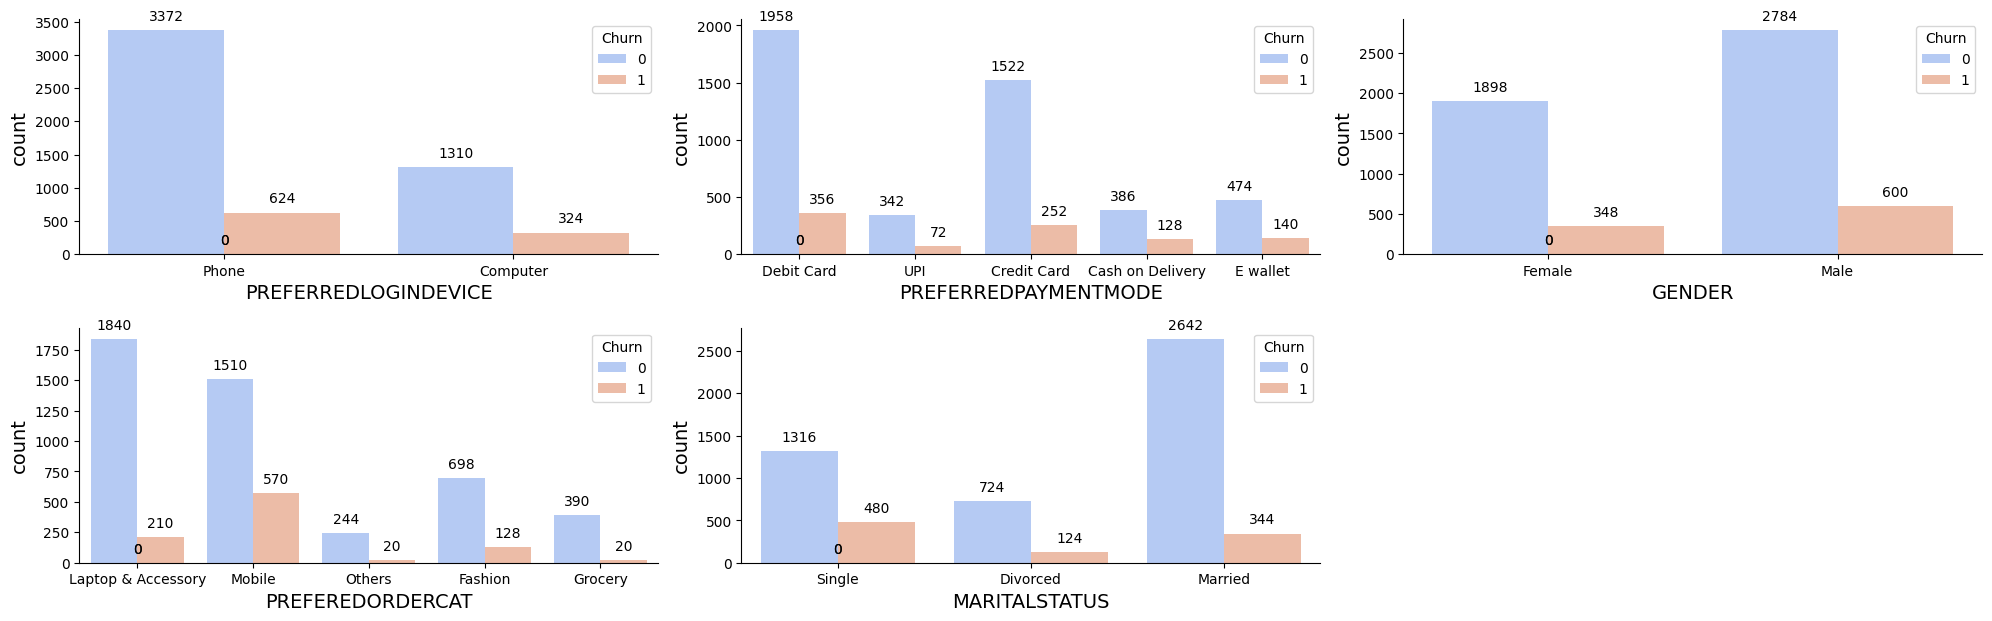

In [ ]:
plt.figure(figsize=(20, 12))
for index, column in enumerate(categorical_col):
    plt.subplot(4, 3, index + 1)
    ax = sns.countplot(data=df, x=column, hue='Churn', palette='coolwarm')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')
    sns.despine()
    plt.xlabel(column.upper(), fontsize=14)
    plt.ylabel("count", fontsize=14)
plt.tight_layout(pad=1.0)
plt.show()

**2. Numerical column visualization**

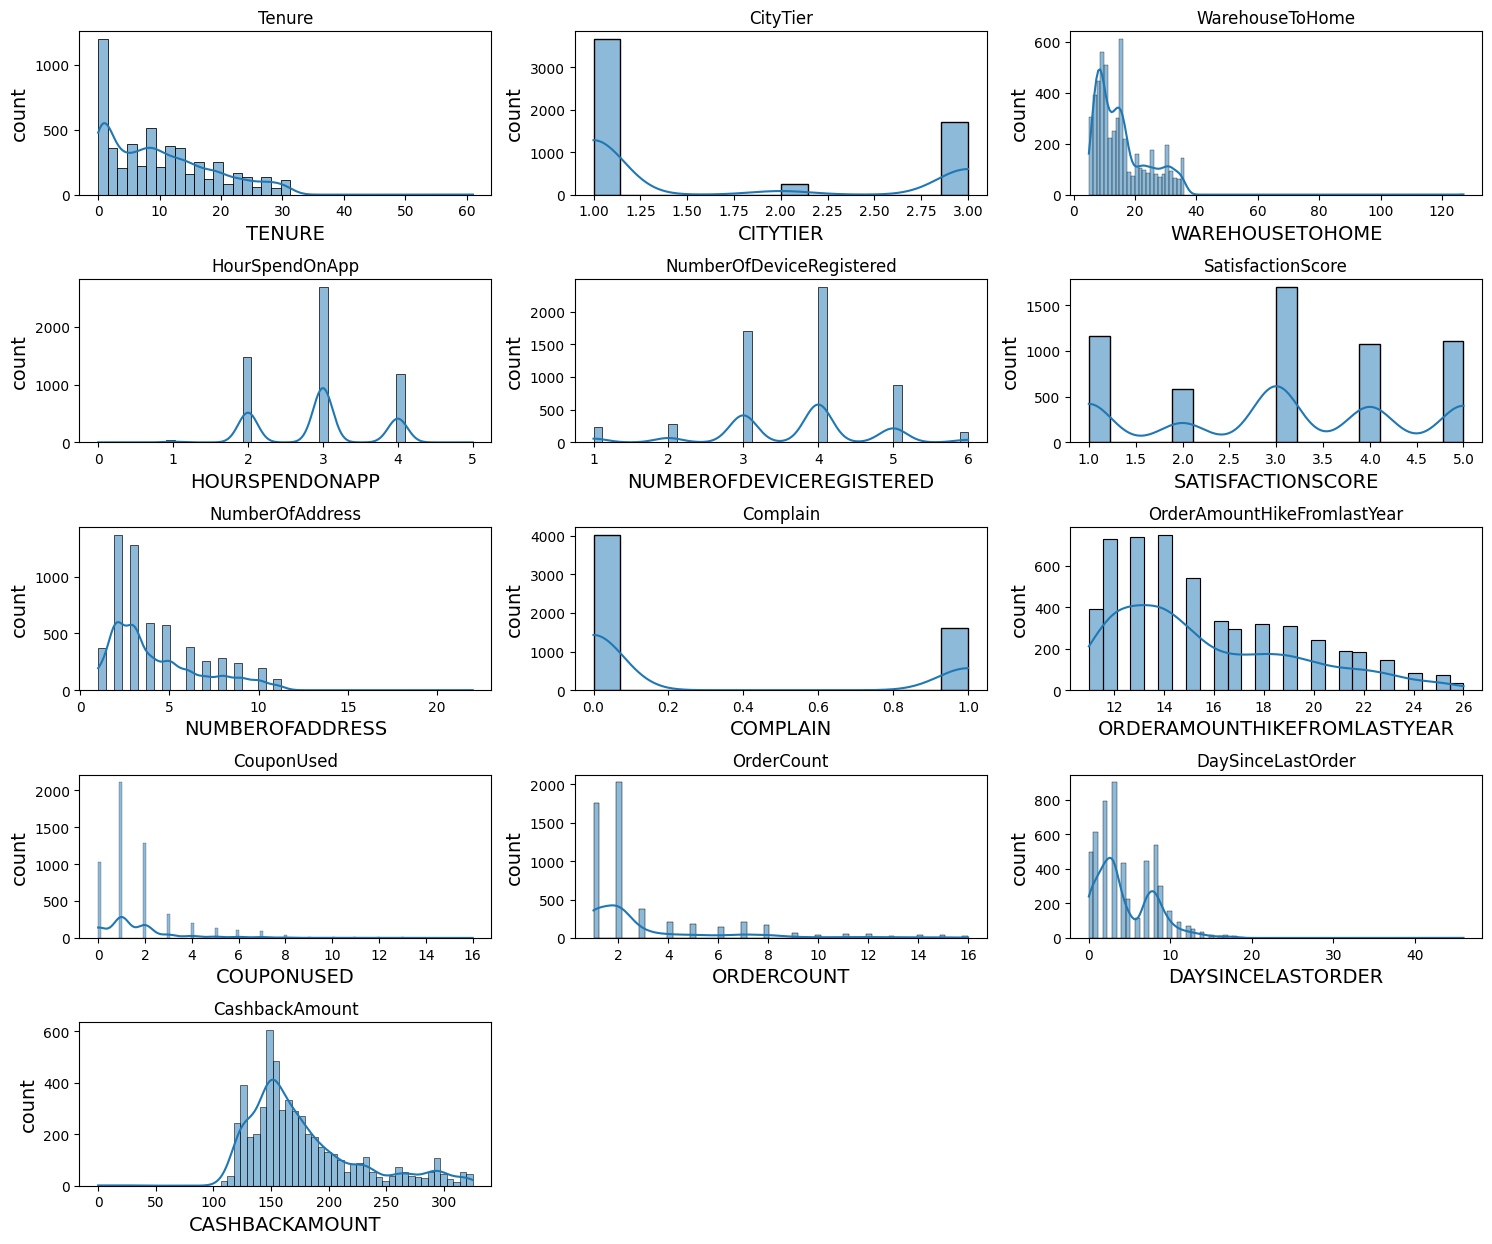

In [ ]:
plt.figure(figsize=(15,17))
num_plots = len(numerical_col)
num_rows = (num_plots + 1) // 2

for index, column in enumerate(numerical_col):
    plt.subplot(num_rows, 3, index + 1)  # Adjusting for the number of rows and columns
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.histplot(df[column],kde=True)
    plt.title(column)  # Use the column name as the title
    plt.xlabel(column.upper(), fontsize=14)
    plt.ylabel("count", fontsize=14)
plt.tight_layout(pad=1.0)
plt.show()

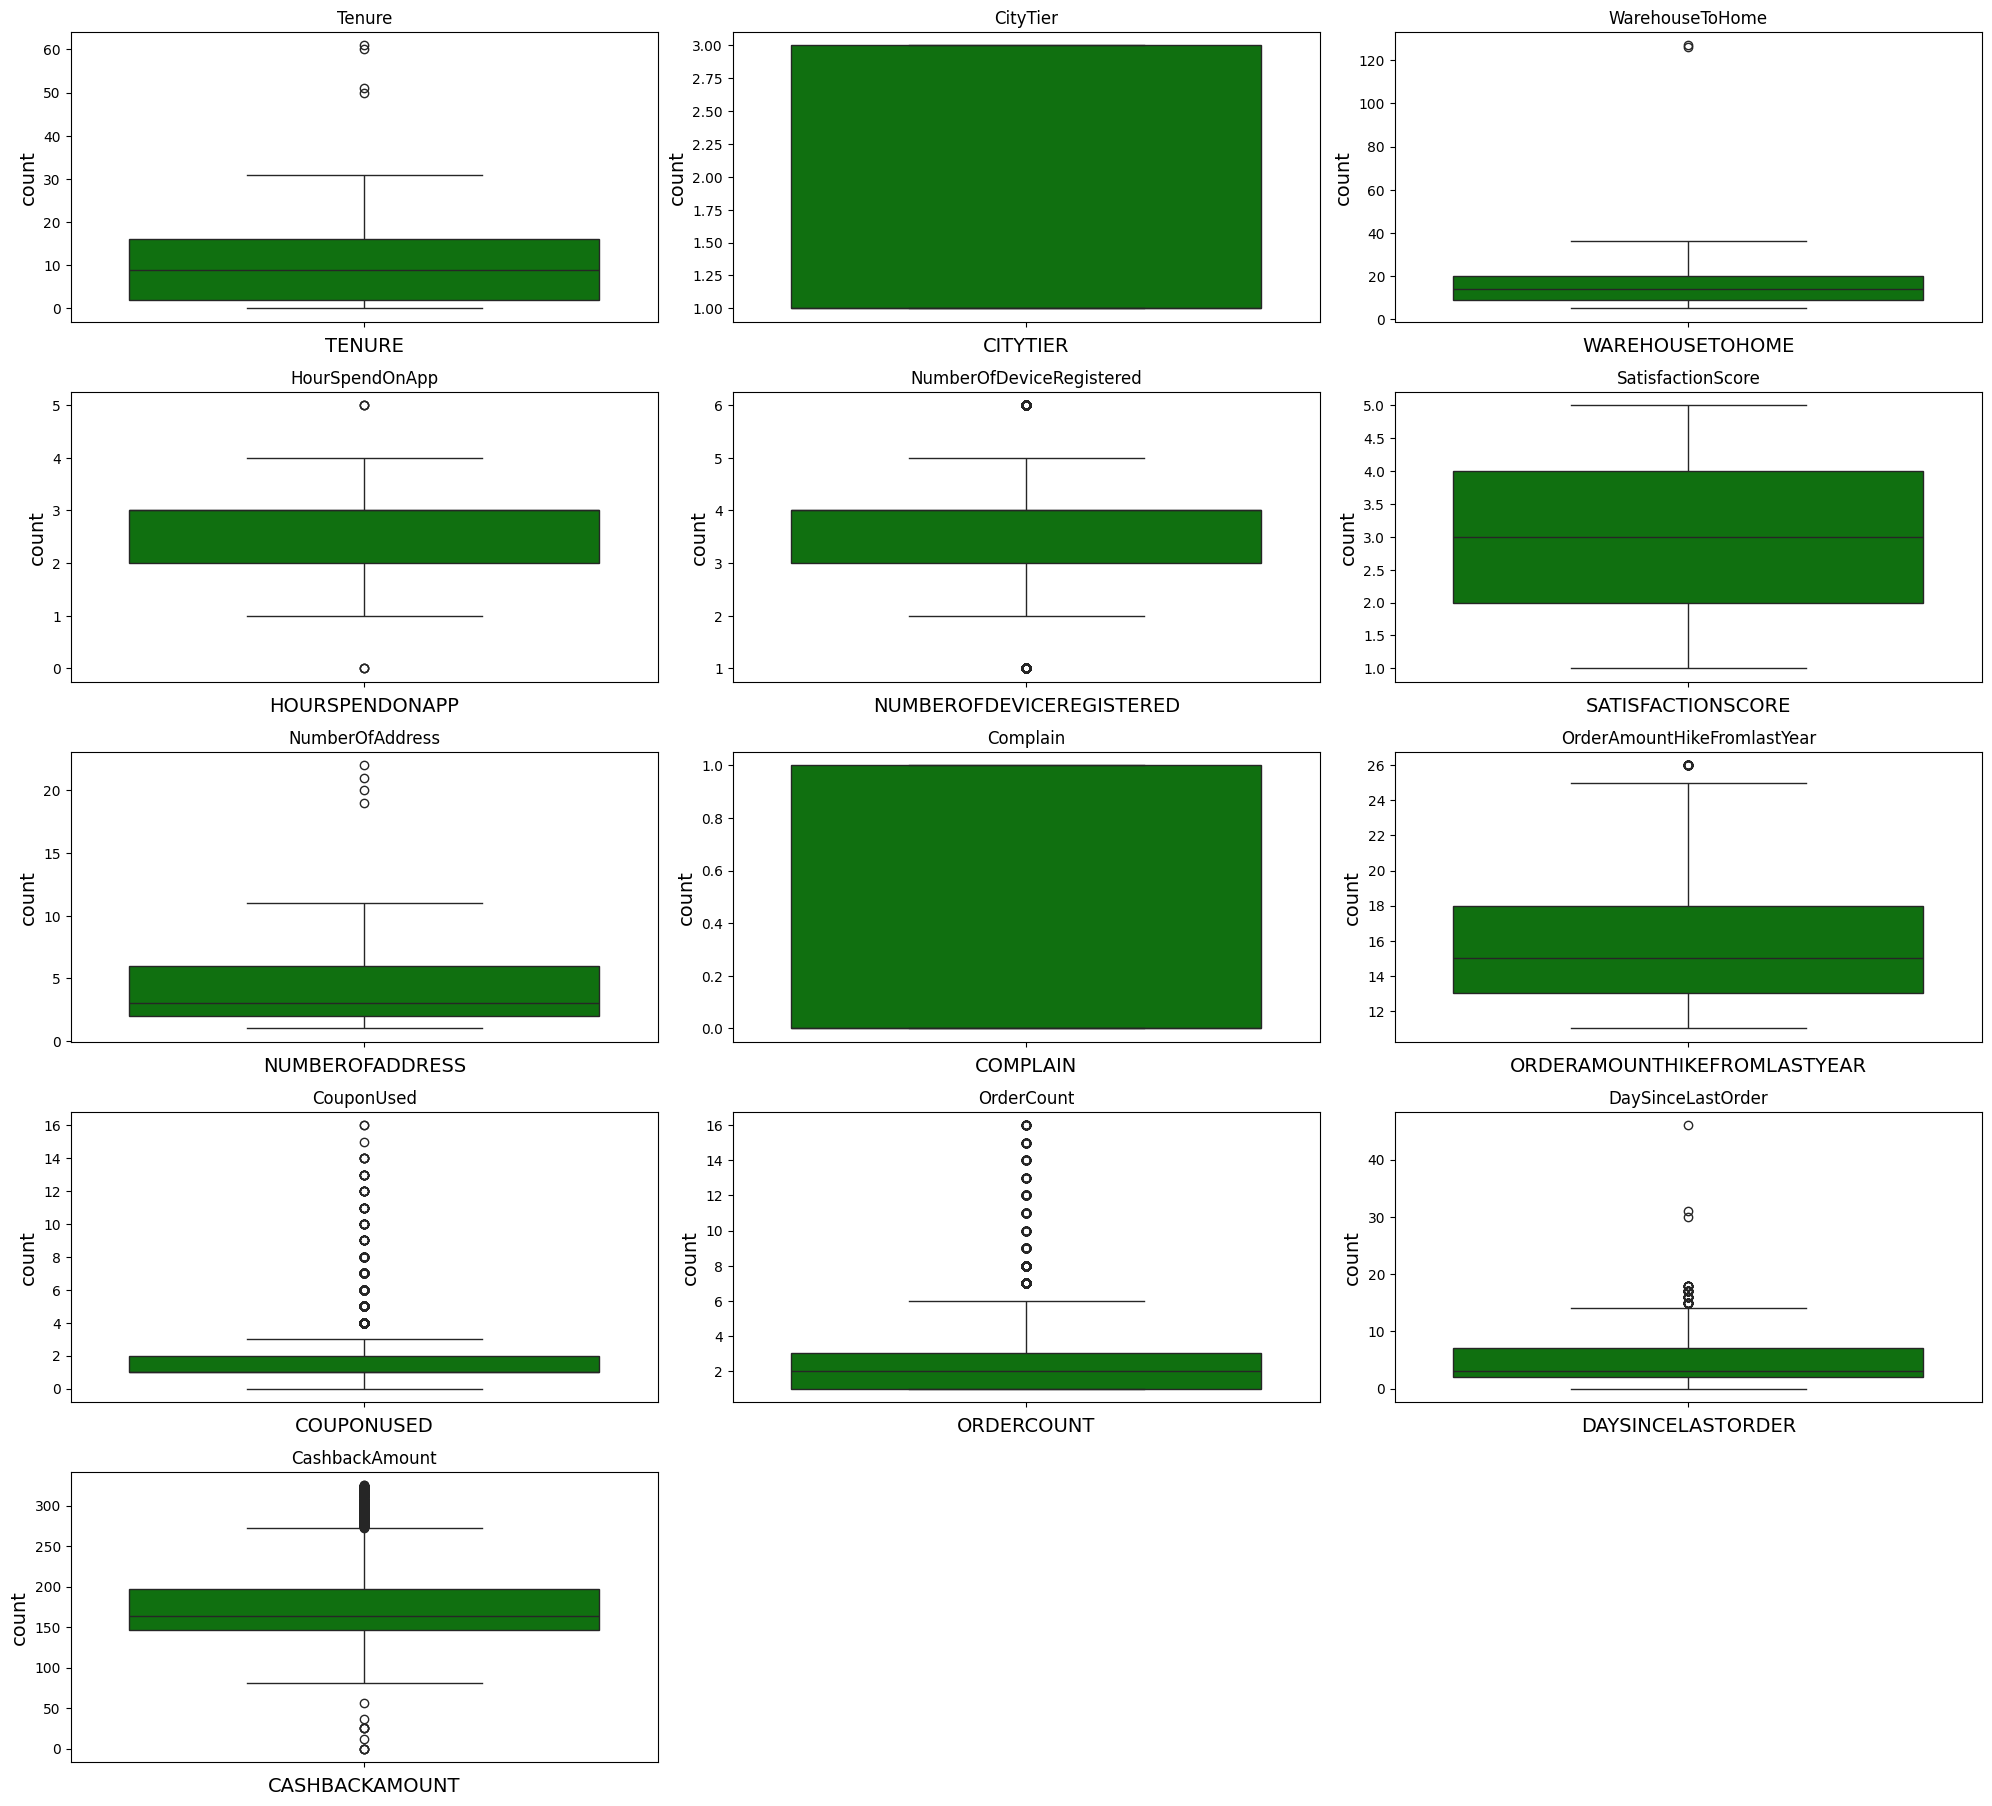

In [ ]:
plt.figure(figsize=(20,25))
num_plots = len(numerical_col)
num_rows = (num_plots + 1) // 2

for index, column in enumerate(numerical_col):
    plt.subplot(num_rows, 3, index + 1)  # Adjusting for the number of rows and columns
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.boxplot(df[column],color='green')
    plt.title(column)  # Use the column name as the title
    plt.xlabel(column.upper(), fontsize=14)
    plt.ylabel("count", fontsize=14)
plt.tight_layout(pad=1.0)
plt.show()

**3. Retained vs Churn**

In [ ]:
total_customers = len(df)
churn = df['Churn'].sum()
churn_rate = 100 * churn / total_customers
print(churn_rate)

16.838365896980463


<ipython-input-16-ba8d9d20271a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Churn'],data=df, palette=mapping_color)


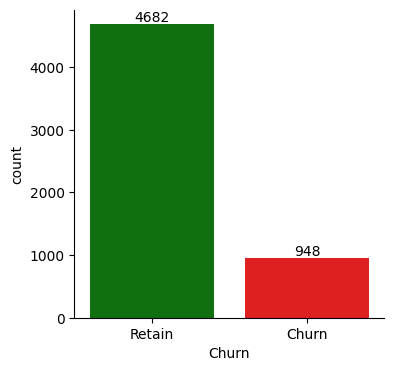

In [ ]:
mapping_color = {
    '0':"green",
    '1':"red"
}
plt.figure(figsize=(4,4))
ax = sns.countplot(x=df['Churn'],data=df, palette=mapping_color)
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.xticks([0,1],['Retain','Churn'])
plt.show()

**4. Order count retain vs churn**

<ipython-input-17-75f358b7f647>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Churn', y='OrderCount',palette=mapping_color)


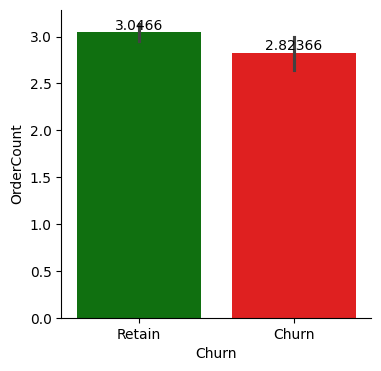

In [ ]:
plt.figure(figsize=(4,4))
ax = sns.barplot(data=df, x='Churn', y='OrderCount',palette=mapping_color)
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.xticks([0,1],['Retain','Churn'])
plt.show()

**5. Tenure vs Churn**

<Figure size 1700x1900 with 0 Axes>

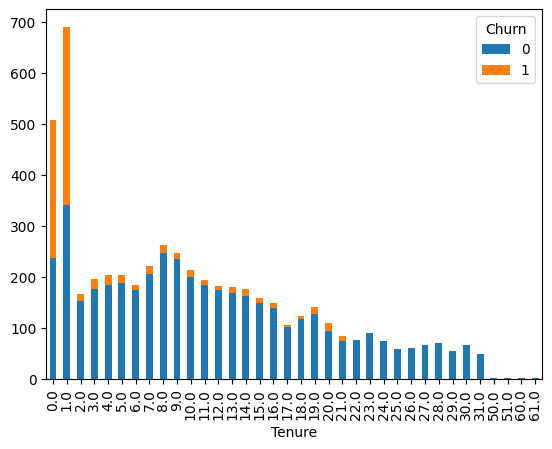

Churn,0,1
Tenure_bin,,
0-10,3177,809
11-20,1269,58
21-40,49,0
>40,4,0


In [ ]:
tenure_churn = pd.crosstab(df['Tenure'], df['Churn'])
tenure_churn.plot(kind='bar', stacked=True)
plt.show()
pd.crosstab(df['Tenure_bin'], df['Churn'])

In [ ]:
df[df['Tenure_bin']=='>40']

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_bin
928,50929,0,50.0,Phone,1,6.0,Debit Card,Male,3.0,1,...,3,Divorced,1,0,24.0,1.0,2.0,8.0,149.00,>40
2719,52720,0,60.0,Phone,3,27.0,Debit Card,Female,3.0,3,...,1,Married,5,1,13.0,NaN,1.0,0.0,278.75,>40
3743,53744,0,51.0,Phone,1,7.0,Debit Card,Male,4.0,2,...,3,Divorced,2,0,25.0,2.0,3.0,9.0,174.00,>40
5534,55535,0,61.0,Phone,3,28.0,Debit Card,Female,4.0,4,...,1,Married,6,1,NaN,1.0,2.0,1.0,303.75,>40


In [ ]:
df.groupby('Tenure_bin')['CashbackAmount'].sum().sort_values(ascending=False)

Tenure_bin
0-10     670237.88
11-20    284219.87
21-40     10597.16
>40         905.50
Name: CashbackAmount, dtype: float64

In [ ]:
df.groupby('Tenure_bin')['OrderCount'].sum().sort_values(ascending=False)

Tenure_bin
0-10     11019.0
11-20     4564.0
21-40      190.0
>40          8.0
Name: OrderCount, dtype: float64

In [ ]:
df.groupby('Tenure_bin')['CouponUsed'].sum().sort_values(ascending=False)

Tenure_bin
0-10     6656.0
11-20    2471.0
21-40     102.0
>40         4.0
Name: CouponUsed, dtype: float64

**Hours spend on app vs churn**

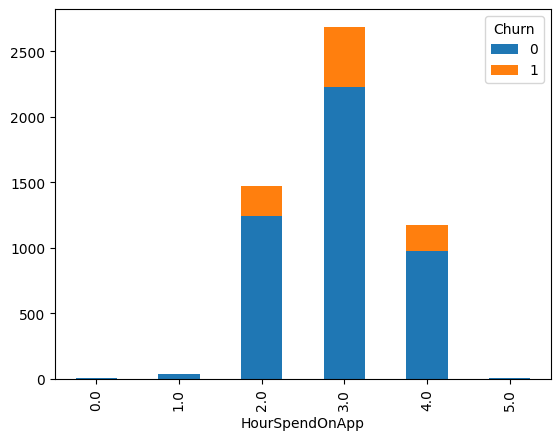

Churn,0,1
HourSpendOnApp,,
0.0,3,0
1.0,35,0
2.0,1239,232
3.0,2227,460
4.0,978,198
5.0,3,0


In [ ]:
hour_churn = pd.crosstab(df['HourSpendOnApp'], df['Churn'])
hour_churn.plot(kind='bar', stacked=True)
plt.show()
pd.crosstab(df['HourSpendOnApp'], df['Churn'])

In [ ]:
df.groupby('HourSpendOnApp')['OrderCount'].sum().sort_values(ascending=False)

HourSpendOnApp
3.0    8039.0
4.0    3883.0
2.0    3630.0
1.0      96.0
5.0      21.0
0.0       2.0
Name: OrderCount, dtype: float64

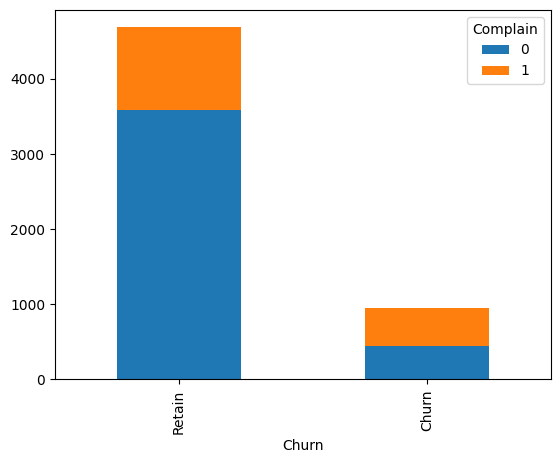

Complain,0,1
Churn,,
0,3586,1096
1,440,508


In [ ]:
pd.crosstab(df['Churn'], df['Complain']).plot(kind='bar', stacked=True)
plt.xticks([0,1],['Retain','Churn'])
plt.show()
pd.crosstab(df['Churn'], df['Complain'])

there are so many complains from retained customers compared to churn. This is not good considering the possibility of retained customers becoming churn because of complains.

the e-commerce should improve their customer service, as this will also increase the satisfaction rating as well.

**6. Preferred order category, cashback, order count, satisfaction score**

In [ ]:
dfsat = df.groupby('SatisfactionScore')['Churn'].sum().sort_values(ascending=False)
dfsat.index

Index([3, 5, 4, 1, 2], dtype='int64', name='SatisfactionScore')

In [ ]:
total_customers = len(df)
churn = df['Churn'].sum()
churn_rate = 100 * churn / total_customers
print(churn_rate)

for i in dfsat.index:

  print(f"Churn rate for score {i}: ", churn_rate)

16.838365896980463
Churn rate for score 3:  16.838365896980463
Churn rate for score 5:  16.838365896980463
Churn rate for score 4:  16.838365896980463
Churn rate for score 1:  16.838365896980463
Churn rate for score 2:  16.838365896980463


In [ ]:
total_customers = len(df)
churn = df['Churn'].sum()
churn_rate = 100 * churn / total_customers
print(churn_rate)

16.838365896980463


### customer satisfaction analysis

In [ ]:
tenure_corr = cor_matrix['Tenure'].sort_values()
ax = tenure_corr.plot(kind='barh')
for i, v in enumerate(tenure_corr.values):
  ax.text(v, i, f'{v:.2f}', va='center')  # Place the value at the end of each bar
plt.show()

<Axes: xlabel='SatisfactionScore'>

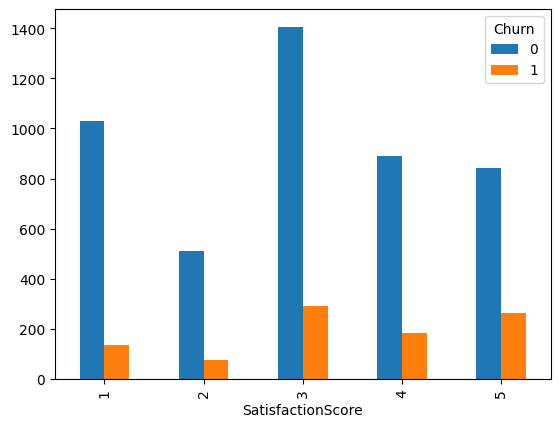

In [ ]:
pd.crosstab(df['SatisfactionScore'],df['Churn']).plot(kind='bar')

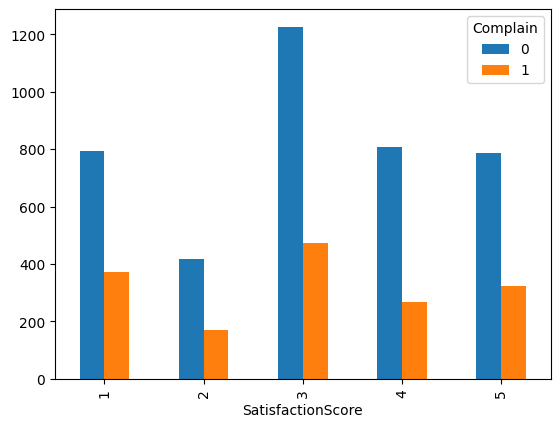

In [ ]:
pd.crosstab(df['SatisfactionScore'],df['Complain']).plot(kind='bar')
plt.show()

<Axes: xlabel='PreferedOrderCat'>

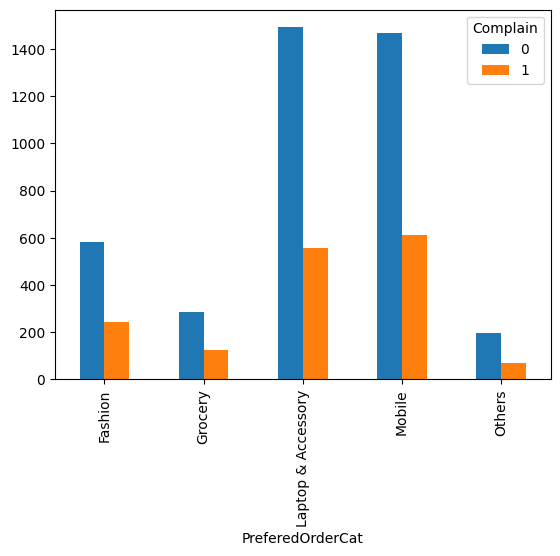

In [ ]:
pd.crosstab(df['PreferedOrderCat'],df['Complain']).plot(kind='bar')

<Axes: >

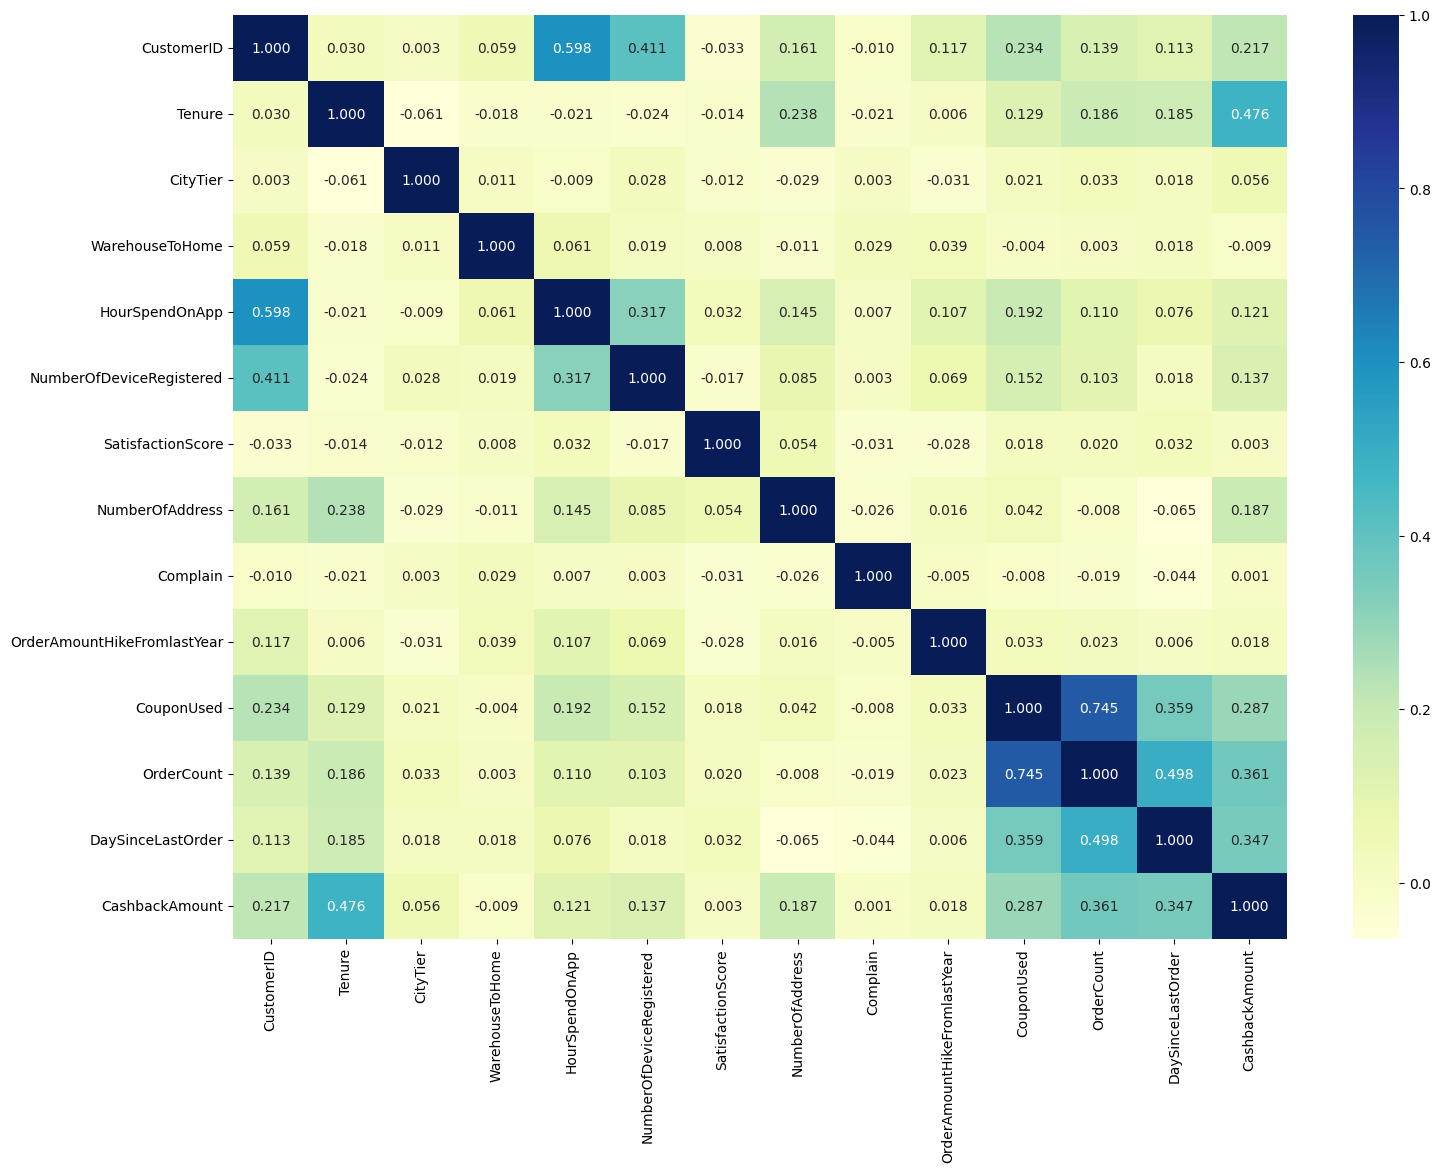

In [ ]:
satisfactioncorr = df.drop('Churn', axis=1)
plt.figure(figsize=(17,12))
sns.heatmap(satisfactioncorr.select_dtypes(include=['int', 'float']).corr(), annot=True, cmap='YlGnBu', fmt=".3f")

In [ ]:
df.groupby('PreferedOrderCat')['CashbackAmount'].sum().sort_values(ascending=False)

PreferedOrderCat
Laptop & Accessory    342797.72
Mobile                291609.30
Fashion               173801.18
Grocery               109154.70
Others                 80402.76
Name: CashbackAmount, dtype: float64

In [ ]:
df.groupby('PreferedOrderCat')['CouponUsed'].sum().sort_values(ascending=False)

PreferedOrderCat
Laptop & Accessory    3385.0
Mobile                2854.0
Fashion               1903.0
Grocery                712.0
Others                 556.0
Name: CouponUsed, dtype: float64

In [ ]:
df.groupby('PreferedOrderCat')['OrderCount'].sum().sort_values(ascending=False)

PreferedOrderCat
Laptop & Accessory    5671.0
Mobile                4540.0
Fashion               2921.0
Grocery               1641.0
Others                1386.0
Name: OrderCount, dtype: float64

In [ ]:
df.groupby('PreferedOrderCat')['SatisfactionScore'].mean().sort_values(ascending=False)

PreferedOrderCat
Fashion               3.106538
Mobile                3.082692
Grocery               3.078049
Others                3.075758
Laptop & Accessory    3.031220
Name: SatisfactionScore, dtype: float64

In [ ]:
df.groupby('PreferedOrderCat')['Complain'].sum().sort_values(ascending=False)

PreferedOrderCat
Mobile                610
Laptop & Accessory    558
Fashion               242
Grocery               126
Others                 68
Name: Complain, dtype: int64

1. Laptop and accessory is the most popular category among the customers with so many cashback amount and coupon used, yet it has the lowest satisfaction score and second highest complain numbers. The e-commerce should improve the service and maintain it, because this category is the second highest number of churned customers.

2. The number of complains from "Mobile" category also can be a reason why customers are churning, although the satisfaction score is second highest.

**7. Correlation of each feature**

<Axes: >

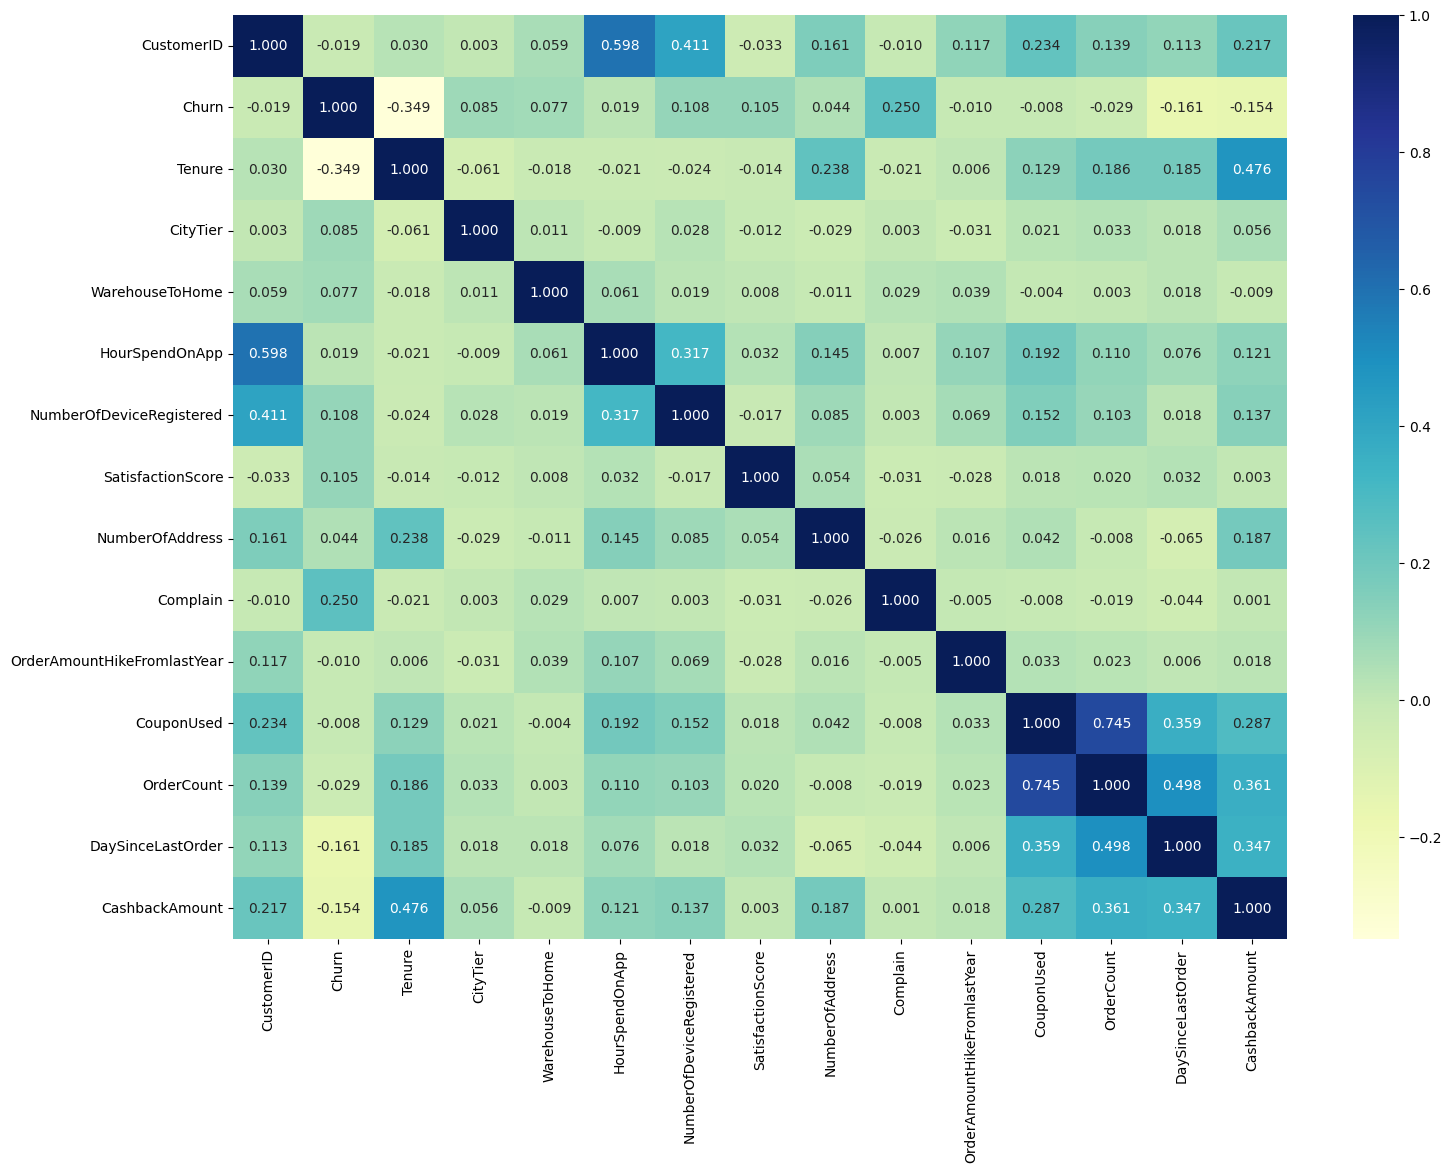

In [ ]:
plt.figure(figsize=(17,12))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(), annot=True, cmap='YlGnBu', fmt=".3f")

Insights for customer behavior:

1. In some cases, customers spent more hours on the e-commerce to look for products, but that doesnt mean that they will automatically make purchases
2. customer's decision to make a purchase heavily influenced by the coupon, followed by how much cashback they get
3. Some customers have more than 1 device
4. Cashback amount, coupon, contributes to a customer's loyalty towards the e-commerce
5. Sometimes customers will use coupon depending on how much cashback they will get, but that is not really affecting their purchase decision

### customer behavior : tenure

In [ ]:
cor_matrix = df.select_dtypes(include=['int', 'float']).corr()

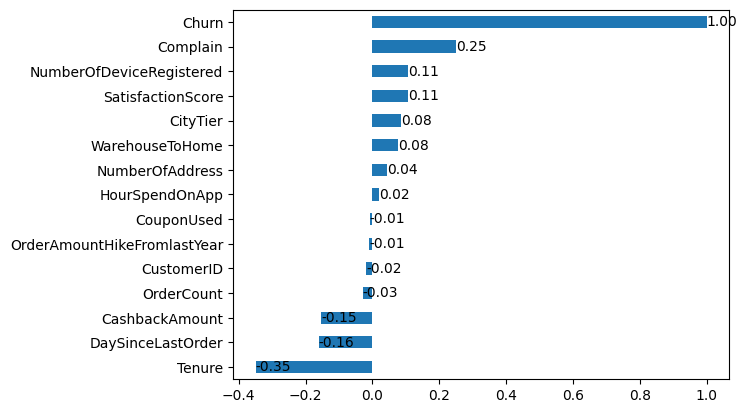

In [ ]:
sats_corr = cor_matrix['Churn'].sort_values()
ax = sats_corr.plot(kind='barh')
for i, v in enumerate(sats_corr.values):
  ax.text(v, i, f'{v:.2f}', va='center')  # Place the value at the end of each bar
plt.show()

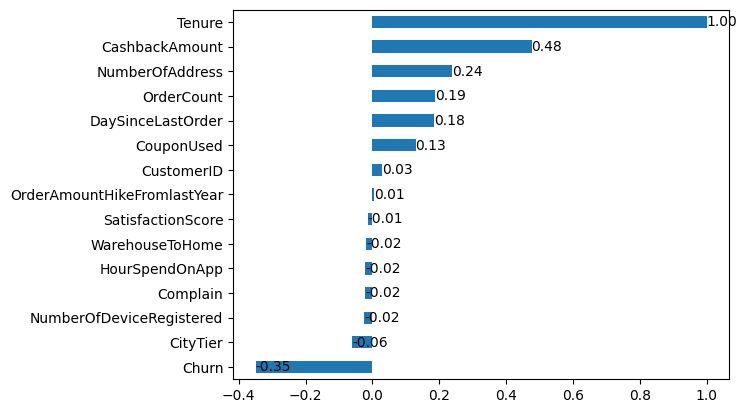

In [ ]:
tenure_corr = cor_matrix['Tenure'].sort_values()
ax = tenure_corr.plot(kind='barh')
for i, v in enumerate(tenure_corr.values):
  ax.text(v, i, f'{v:.2f}', va='center')  # Place the value at the end of each bar
plt.show()

##**4. Splitting data and preprocessing**

### Splitting data into training set and testing set

In [ ]:
# Define X and y
X = df.drop(['Churn','CustomerID','Tenure_bin'],axis=1)
y = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)

print("X train row: ", X_train.shape[0])
print("X train cols: ", X_train.shape[1])

print("X test row: ", X_test.shape[0])
print("X test cols: ", X_test.shape[1])

X train row:  4504
X train cols:  18
X test row:  1126
X test cols:  18


### Imputation

In [ ]:
imp_mean = SimpleImputer(strategy='mean')
imp_med = SimpleImputer(strategy='median')
imp_mode = SimpleImputer(strategy='most_frequent')

**Training set**

In [ ]:
# Mean
X_train['HourSpendOnApp'] = imp_mean.fit_transform(X_train['HourSpendOnApp'].values.reshape(-1,1))

# Median
med_col = ['Tenure', 'WarehouseToHome','OrderAmountHikeFromlastYear','OrderCount', 'CouponUsed','DaySinceLastOrder']
X_train[med_col] = imp_med.fit_transform(X_train[med_col])

**Testing set**

In [ ]:
# Mean
X_test['HourSpendOnApp'] = imp_mean.transform(X_test['HourSpendOnApp'].values.reshape(-1,1))

# Median
X_test[med_col] = imp_med.transform(X_test[med_col])

### Label Encoding

**Label Encoding**

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       5366 non-null   float64
 1   PreferredLoginDevice         5630 non-null   object 
 2   CityTier                     5630 non-null   int64  
 3   WarehouseToHome              5379 non-null   float64
 4   PreferredPaymentMode         5630 non-null   object 
 5   Gender                       5630 non-null   object 
 6   HourSpendOnApp               5375 non-null   float64
 7   NumberOfDeviceRegistered     5630 non-null   int64  
 8   PreferedOrderCat             5630 non-null   object 
 9   SatisfactionScore            5630 non-null   int64  
 10  MaritalStatus                5630 non-null   object 
 11  NumberOfAddress              5630 non-null   int64  
 12  Complain                     5630 non-null   int64  
 13  OrderAmountHikeFro

In [ ]:
categorical_col = X.select_dtypes(include=['object','category']).columns

In [ ]:
for cols in categorical_col:
    le = preprocessing.LabelEncoder()  # Create a LabelEncoder object for each column
    X_train[cols] = le.fit_transform(X_train[cols])  # Fit and transform the training data
    X_test[cols] = le.transform(X_test[cols])  # Transform the test data using the fitted encoder

    print(f"Categories in X_train {cols}:", X_train[cols].unique())
    print(f"Categories in X_test {cols}:", X_test[cols].unique())

    # Print the classes and their corresponding labels
    classes = le.classes_
    for label, category in enumerate(classes):
        print(f"Label: {label}, Category: {category}")
    print("")

Categories in X_train PreferredLoginDevice: [0 1]
Categories in X_test PreferredLoginDevice: [0 1]
Label: 0, Category: Computer
Label: 1, Category: Phone

Categories in X_train PreferredPaymentMode: [1 2 0 3 4]
Categories in X_test PreferredPaymentMode: [2 3 1 4 0]
Label: 0, Category: Cash on Delivery
Label: 1, Category: Credit Card
Label: 2, Category: Debit Card
Label: 3, Category: E wallet
Label: 4, Category: UPI

Categories in X_train Gender: [1 0]
Categories in X_test Gender: [1 0]
Label: 0, Category: Female
Label: 1, Category: Male

Categories in X_train PreferedOrderCat: [0 2 3 4 1]
Categories in X_test PreferedOrderCat: [2 0 3 4 1]
Label: 0, Category: Fashion
Label: 1, Category: Grocery
Label: 2, Category: Laptop & Accessory
Label: 3, Category: Mobile
Label: 4, Category: Others

Categories in X_train MaritalStatus: [2 1 0]
Categories in X_test MaritalStatus: [1 2 0]
Label: 0, Category: Divorced
Label: 1, Category: Married
Label: 2, Category: Single



In [ ]:
X_train.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1787,9.0,0,3,16.0,1,1,2.0,3,0,1,2,2,0,14.0,8.0,9.0,7.0,199.80
2147,6.0,0,3,13.0,2,0,1.0,3,2,4,1,1,0,17.0,0.0,1.0,2.0,143.02
1717,8.0,1,1,15.0,2,1,3.0,4,2,4,2,10,0,19.0,0.0,1.0,0.0,165.40
2292,15.0,1,3,11.0,2,1,3.0,3,0,4,2,10,1,19.0,7.0,7.0,7.0,184.46
5578,12.0,0,1,13.0,2,1,4.0,5,2,3,1,4,0,12.0,3.0,8.0,8.0,178.21


In [ ]:
data_join = X_train.join(y_train)

### Feature Selection

**checking correlation**

based on the heatmap above, there are some multicolinearity:

1. ordercount is heavily influenced by coupon used, day since last order, and cashback amount
2. cashback amount given by the e-commerce contribute to a customer's tenure

In [ ]:
cor_matrix = data_join.corr()
cor_matrix

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
Tenure,1.000000,0.049123,-0.069998,-0.006013,-0.016300,-0.044616,-0.010705,-0.018609,-0.187383,-0.012787,-0.106564,0.239124,-0.016136,-0.009971,0.107530,0.160547,0.168028,0.477178,-0.341274
PreferredLoginDevice,0.049123,1.000000,0.003607,-0.018884,0.012254,-0.011925,0.009403,-0.024349,-0.002143,0.041695,-0.022217,0.027684,0.004896,-0.023226,-0.027750,-0.021844,0.002270,0.041881,-0.057351
CityTier,-0.069998,0.003607,1.000000,0.015882,0.250403,-0.020248,-0.010622,0.025739,-0.154596,-0.007769,-0.001112,-0.033851,0.011742,-0.029488,0.014880,0.033752,0.003752,0.051899,0.096892
WarehouseToHome,-0.006013,-0.018884,0.015882,1.000000,0.009792,0.005175,0.063411,0.014850,-0.084298,0.000859,-0.019756,-0.009572,0.037144,0.031274,0.003966,-0.007879,0.023676,0.006352,0.067993
PreferredPaymentMode,-0.016300,0.012254,0.250403,0.009792,1.000000,0.018933,-0.012130,0.010955,-0.031064,-0.012329,-0.027180,-0.016427,0.023395,-0.001552,-0.000042,-0.019347,0.004881,0.038225,0.007239
Gender,-0.044616,-0.011925,-0.020248,0.005175,0.018933,1.000000,-0.014599,-0.012821,0.061023,-0.038808,-0.020440,-0.026671,-0.045954,-0.005265,-0.035820,-0.028649,-0.008011,-0.028012,0.032610
HourSpendOnApp,-0.010705,0.009403,-0.010622,0.063411,-0.012130,-0.014599,1.000000,0.315082,0.036271,0.026388,-0.038996,0.148121,0.005235,0.101659,0.197007,0.115607,0.059274,0.122675,0.016043
NumberOfDeviceRegistered,-0.018609,-0.024349,0.025739,0.014850,0.010955,-0.012821,0.315082,1.000000,-0.009157,-0.014167,0.030726,0.087659,0.015027,0.072294,0.157803,0.106096,0.002781,0.133024,0.115361
PreferedOrderCat,-0.187383,-0.002143,-0.154596,-0.084298,-0.031064,0.061023,0.036271,-0.009157,1.000000,-0.000846,0.050421,-0.095369,-0.009127,-0.010653,-0.144693,-0.156087,-0.166743,-0.348068,0.098269
SatisfactionScore,-0.012787,0.041695,-0.007769,0.000859,-0.012329,-0.038808,0.026388,-0.014167,-0.000846,1.000000,-0.048383,0.057114,-0.038540,-0.021984,0.012912,0.007912,0.028560,0.004828,0.111479


In [ ]:
cor_matrix['Churn'].sort_values()

Tenure                        -0.341274
CashbackAmount                -0.162478
DaySinceLastOrder             -0.162073
PreferredLoginDevice          -0.057351
OrderCount                    -0.029253
OrderAmountHikeFromlastYear   -0.009311
CouponUsed                    -0.000833
PreferredPaymentMode           0.007239
HourSpendOnApp                 0.016043
Gender                         0.032610
NumberOfAddress                0.042664
WarehouseToHome                0.067993
CityTier                       0.096892
PreferedOrderCat               0.098269
SatisfactionScore              0.111479
NumberOfDeviceRegistered       0.115361
MaritalStatus                  0.142811
Complain                       0.247916
Churn                          1.000000
Name: Churn, dtype: float64

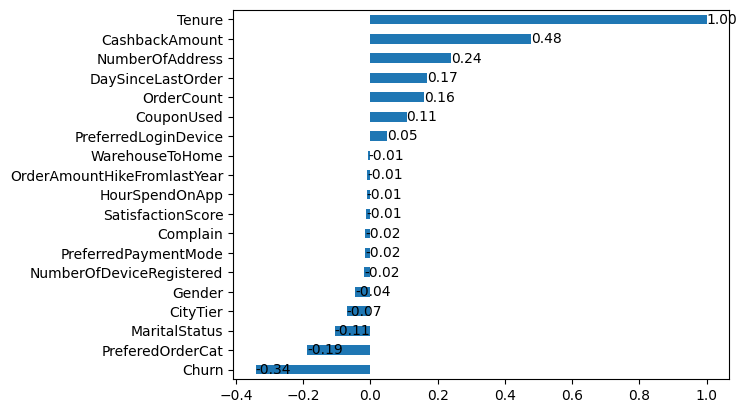

##**5. Machine Learning Modeling**

For modeling, i am going to focus on Recall and its sensitivity to target '1' (churn)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score

### Logistic Regression

The test accuracy score is  0.8614564831261101
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       936
           1       0.65      0.38      0.48       190

    accuracy                           0.86      1126
   macro avg       0.77      0.67      0.70      1126
weighted avg       0.85      0.86      0.85      1126



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(113.9222222222222, 0.5, 'Actual label')

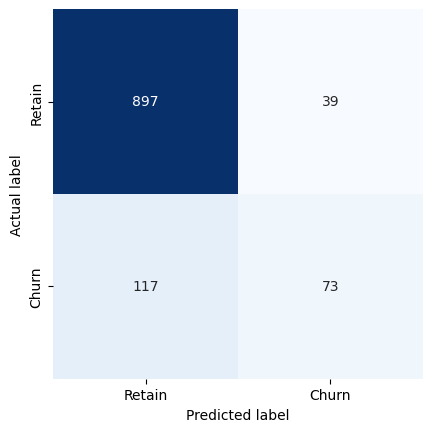

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("The test accuracy score is ", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
conf = confusion_matrix(y_test, y_pred)
labels = ['Retain', 'Churn']
sns.heatmap(conf, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Logistic regression got quite nice scores for predicting 0 (retain), but did not do well while predicting 1 (churn). It's because of the imbalanced data (i did not do any oversampling / undersampling / hybrid method on purpose)

In [ ]:
for col, coef in zip(X_train.columns, lr.coef_[0]):
    print(f"Column: {col}")
    print(f"Coefficient: {coef}")
    print(" ")

Column: Tenure
Coefficient: -0.2112212659717641
 
Column: PreferredLoginDevice
Coefficient: -0.32549996134435677
 
Column: CityTier
Coefficient: 0.40723196672826406
 
Column: WarehouseToHome
Coefficient: 0.025363926581054262
 
Column: PreferredPaymentMode
Coefficient: -0.02856178012064846
 
Column: Gender
Coefficient: 0.09203769281834431
 
Column: HourSpendOnApp
Coefficient: -0.25920098571004196
 
Column: NumberOfDeviceRegistered
Coefficient: 0.4351973132888372
 
Column: PreferedOrderCat
Coefficient: -0.3202228845352313
 
Column: SatisfactionScore
Coefficient: 0.38318938380767326
 
Column: MaritalStatus
Coefficient: 0.5525751661587087
 
Column: NumberOfAddress
Coefficient: 0.20836505404211575
 
Column: Complain
Coefficient: 1.1339350551087581
 
Column: OrderAmountHikeFromlastYear
Coefficient: -0.07532262936712335
 
Column: CouponUsed
Coefficient: 0.03958685552352347
 
Column: OrderCount
Coefficient: 0.16875750156843902
 
Column: DaySinceLastOrder
Coefficient: -0.1346341856197799
 
Colu

### MLPClassifier

The test accurac y score is  0.9031971580817052
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       936
           1       0.79      0.58      0.67       190

    accuracy                           0.90      1126
   macro avg       0.85      0.78      0.81      1126
weighted avg       0.90      0.90      0.90      1126



Text(113.9222222222222, 0.5, 'Actual label')

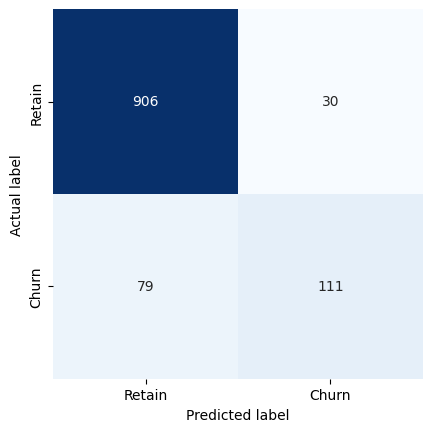

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("The test accurac y score is ", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
conf = confusion_matrix(y_test, y_pred)
labels = ['Retain', 'Churn']
sns.heatmap(conf, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

### Random Forest

The test accuracy score is  0.9875666074600356
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       936
           1       0.98      0.94      0.96       190

    accuracy                           0.99      1126
   macro avg       0.99      0.97      0.98      1126
weighted avg       0.99      0.99      0.99      1126



Text(113.9222222222222, 0.5, 'Actual label')

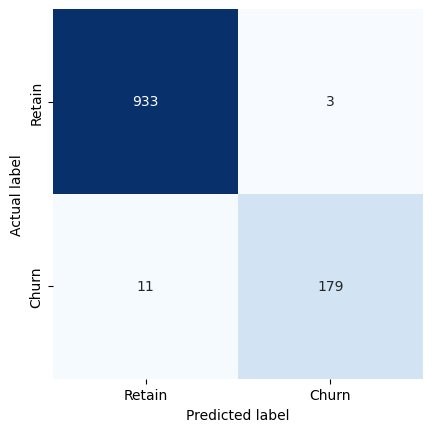

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("The test accuracy score is ", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
conf = confusion_matrix(y_test, y_pred)
labels = ['Retain', 'Churn']
sns.heatmap(conf, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

**feature importance**

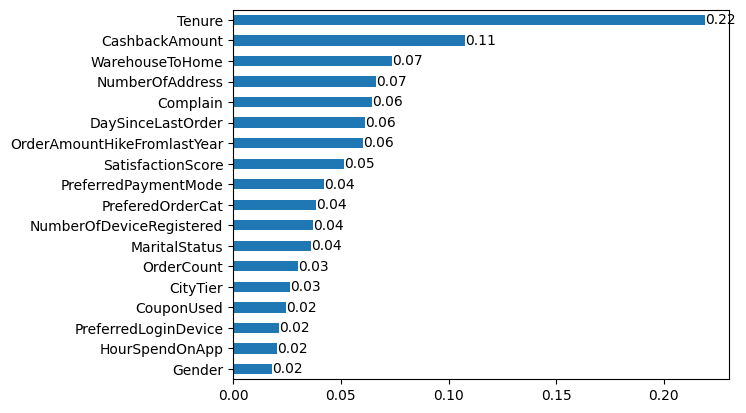

In [ ]:
# get importance
importance = rfc.feature_importances_
# summarize feature importance
feature_importance = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=True)
ax = feature_importance.plot(y=feature_importance.index,x=feature_importance.values,kind='barh')
for i, v in enumerate(feature_importance.values):
  ax.text(v, i, f'{v:.2f}', va='center')  # Place the value at the end of each bar
plt.show()

### Decision Tree

The test accuracy score is  0.9626998223801065
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       936
           1       0.87      0.92      0.89       190

    accuracy                           0.96      1126
   macro avg       0.93      0.94      0.93      1126
weighted avg       0.96      0.96      0.96      1126



Text(113.9222222222222, 0.5, 'Actual label')

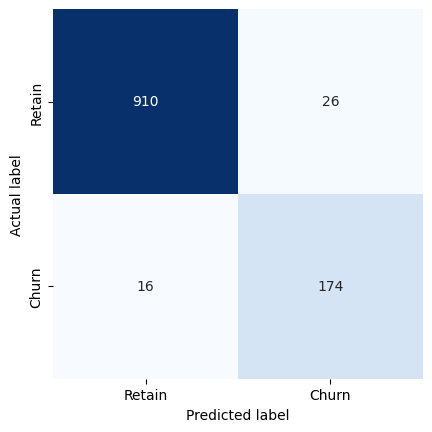

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("The test accuracy score is ", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
conf = confusion_matrix(y_test, y_pred)
labels = ['Retain', 'Churn']
sns.heatmap(conf, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

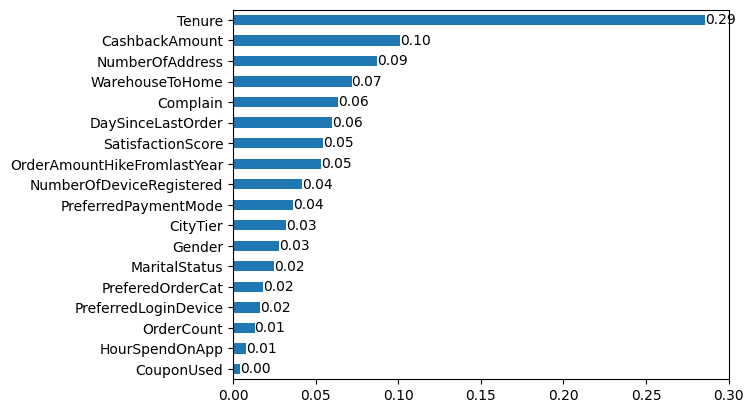

In [ ]:
# get importance
importance = dt.feature_importances_
# summarize feature importance
feature_importance = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=True)
ax = feature_importance.plot(y=feature_importance.index,x=feature_importance.values,kind='barh')
for i, v in enumerate(feature_importance.values):
  ax.text(v, i, f'{v:.2f}', va='center')  # Place the value at the end of each bar
plt.show()

### XGBoost

The test accuracy score is  0.9920071047957372
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       936
           1       0.99      0.96      0.98       190

    accuracy                           0.99      1126
   macro avg       0.99      0.98      0.99      1126
weighted avg       0.99      0.99      0.99      1126



Text(113.9222222222222, 0.5, 'Actual label')

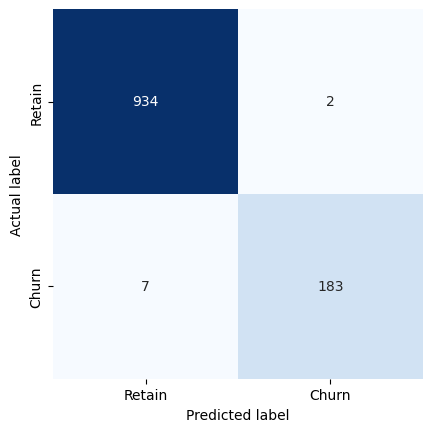

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("The test accuracy score is ", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
conf = confusion_matrix(y_test, y_pred)
labels = ['Retain', 'Churn']
sns.heatmap(conf, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

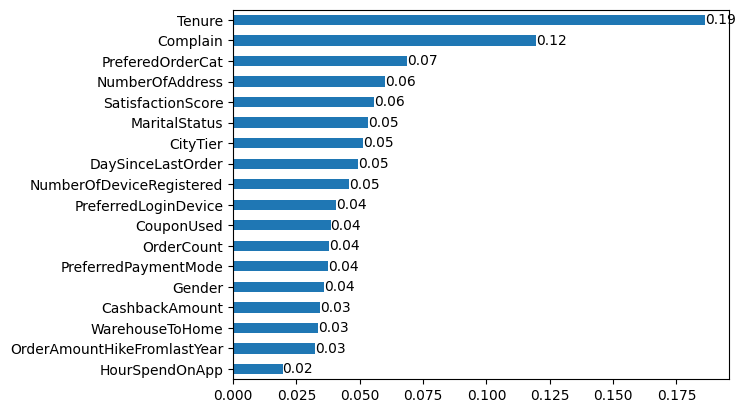

In [ ]:
# get importance
importance = xgb.feature_importances_
# summarize feature importance
feature_importance = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=True)
ax = feature_importance.plot(y=feature_importance.index,x=feature_importance.values,kind='barh')
for i, v in enumerate(feature_importance.values):
  ax.text(v, i, f'{v:.2f}', va='center')  # Place the value at the end of each bar
plt.show()

### Experiment with hybrid sampling and oversampling

Random forest, decision tree, and XGBoost gave us prediction scores between 96%-99%, and that is very high. However, I would like to remind that we are dealing with an imbalance dataset, where class 1 (Churn) only represents less than 0.2% of the data, so the models will predict 99.8% that a customer is retaining all the time. This shows that high prediction score does not mean it will automatically fulfill business needs.

Thus, I am going to experiment with hybrid sampling and oversampling for random forest, decision tree, and XGBoost and see how the model will perform on confusion matrix.

**With SMOTEENN**

SMOTEENN method is a hybrid sampling, which is the combination of oversampling and undersampling. This method could reduce the noise caused by oversampling while also make the minority class being more detected.

**With SMOTE / RandomOverSampler**

SMOTE & RandomOverSampler is an oversampling method. It makes a synthetic data for the minority class, which is class 1 or Churn in this context. A drawback of oversampling is it could introduce noise to the data.

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

**building a function**

In [ ]:
from imblearn.pipeline import Pipeline

def ml_balance(sampler_title, sampler, model_title, model):
  estimators = [
    (sampler_title, sampler),
    (model_title, model)
    ]
  pipe = Pipeline(estimators)
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  print("The test accuracy score is ", accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred))
  conf = confusion_matrix(y_test, y_pred)
  labels = ['Retain', 'Churn']
  sns.heatmap(conf, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted label')
  plt.ylabel('Actual label')

#### Balancing Decision Tree

**with SMOTEENN (hybrid)**

The test accuracy score is  0.8765541740674956
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       936
           1       0.59      0.84      0.70       190

    accuracy                           0.88      1126
   macro avg       0.78      0.86      0.81      1126
weighted avg       0.90      0.88      0.88      1126



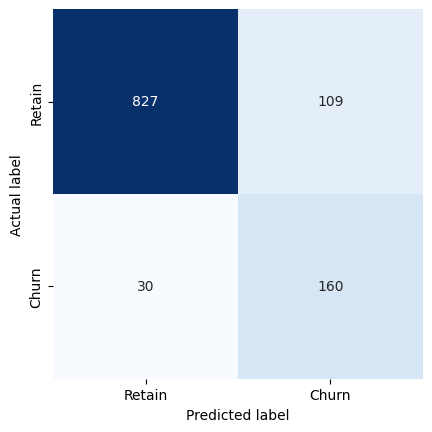

In [ ]:
ml_balance('smoteenn', SMOTEENN(random_state=42), 'decisiontree', DecisionTreeClassifier())

with SMOTEENN, decision tree detected that:

- 120 customers are actually retained but predicted as churn
- 30 customers are actually churned but predicted as retain
- 83% sensitivity for class 1 (Churn) & 87% for class 0 (retain)

**with SMOTE (oversample)**

The test accuracy score is  0.9387211367673179
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       936
           1       0.76      0.93      0.84       190

    accuracy                           0.94      1126
   macro avg       0.87      0.93      0.90      1126
weighted avg       0.95      0.94      0.94      1126



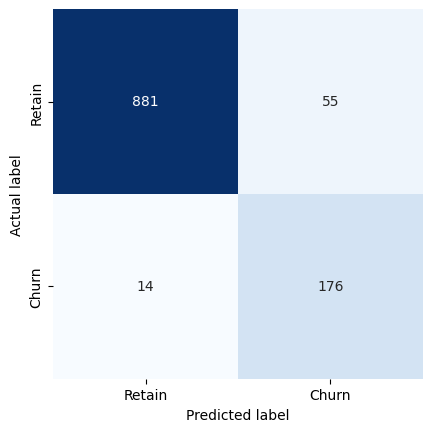

In [ ]:
ml_balance('SMOTE', SMOTE(random_state=42), 'decisiontree', DecisionTreeClassifier())

with SMOTE, decision tree detected that:

- 51 customers are actually retained but predicted as churn
- 19 customers are actually churned but predicted as retain
- 90% sensitivity for class 1 (Churn) and 95% for class 0 (retain)

**with RandomOverSampler (oversample)**

The test accuracy score is  0.9680284191829485
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       936
           1       0.92      0.88      0.90       190

    accuracy                           0.97      1126
   macro avg       0.95      0.93      0.94      1126
weighted avg       0.97      0.97      0.97      1126



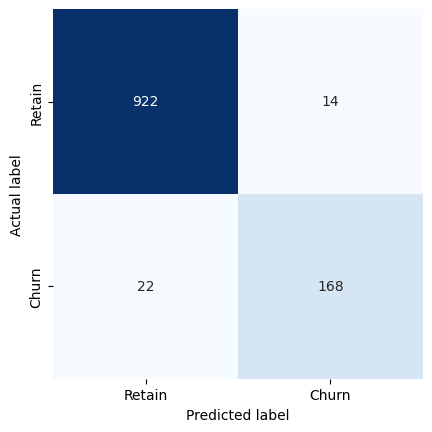

In [ ]:
ml_balance('Sampler', RandomOverSampler(random_state=42), 'decisiontree', DecisionTreeClassifier())

with RandomOverSampler, decision tree detected that:

- 15 customers are actually retained but predicted as churn
- 25 customers are actually churned but predicted as retain
- 87% sensitivity for class 1 (Churn) but 98% for class 0, this means the model are more sensitive towards retain class

#### Balancing XGBoost

**with SMOTEENN (hybrid)**

The test accuracy score is  0.9174067495559503
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       936
           1       0.69      0.94      0.79       190

    accuracy                           0.92      1126
   macro avg       0.84      0.93      0.87      1126
weighted avg       0.94      0.92      0.92      1126



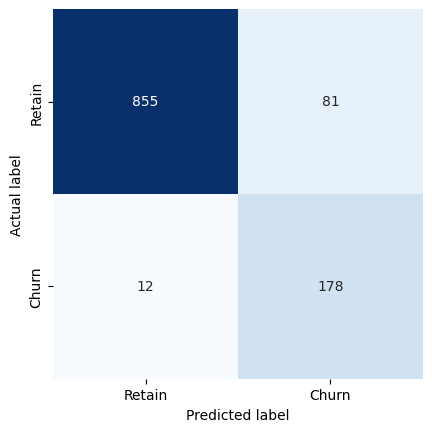

In [ ]:
ml_balance('smoteenn', SMOTEENN(random_state=42), 'xgb', XGBClassifier())

with SMOTEENN, XGBoost detected that:

- 81 customers are actually retained but predicted as churn
- 12 customers are actually churned but predicted as retain
- 94% sensitivity for class 1 (Churn) and 91% for class 0 (Retain)

**with SMOTE (oversample)**

The test accuracy score is  0.9840142095914742
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.95      0.96      0.95       190

    accuracy                           0.98      1126
   macro avg       0.97      0.97      0.97      1126
weighted avg       0.98      0.98      0.98      1126



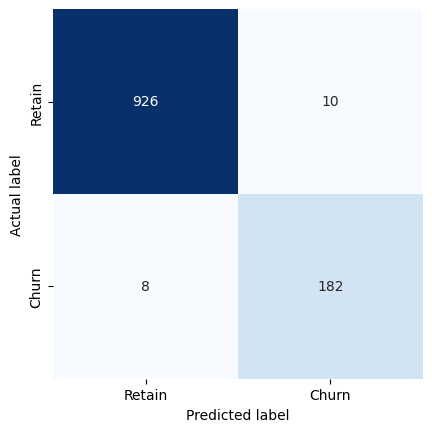

In [ ]:
ml_balance('SMOTE', SMOTE(random_state=42), 'xgb', XGBClassifier())

with SMOTE, XGBoost detected that:

- 10 customers are actually retained but predicted as churn
- 8 customers are actually churned but predicted as retain
- 96% sensitivity for class 1 (Churn) and 99% for class 0 (Retain)

**with RandomOverSampler (oversample)**

The test accuracy score is  0.9893428063943162
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.96      0.97      0.97       190

    accuracy                           0.99      1126
   macro avg       0.98      0.98      0.98      1126
weighted avg       0.99      0.99      0.99      1126



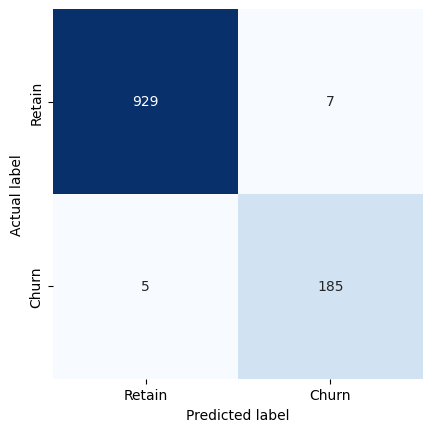

In [ ]:
ml_balance('Sampler', RandomOverSampler(random_state=42), 'xgb', XGBClassifier())

with RandomOverSampler, XGBoost detected that:

- 7 customers are actually retained but predicted as churn
- 5 customers are actually churned but predicted as retain
- 97% sensitivity for class 1 (Churn) and 99% for class 0 (Retain)

#### Balancing Random Forest

**with SMOTEENN (hybrid)**

The test accuracy score is  0.9014209591474245
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       936
           1       0.65      0.90      0.75       190

    accuracy                           0.90      1126
   macro avg       0.81      0.90      0.85      1126
weighted avg       0.92      0.90      0.91      1126



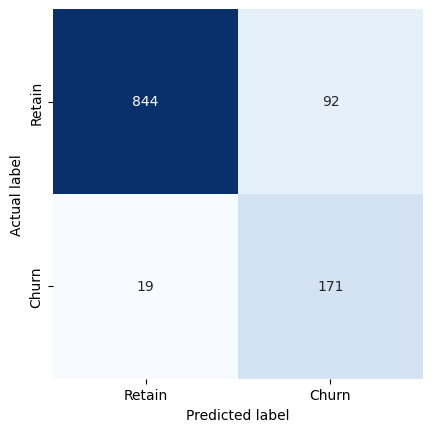

In [ ]:
ml_balance('smoteenn', SMOTEENN(random_state=42), 'rfc', RandomForestClassifier())

with SMOTEENN, Random Forest detected that:

- 88 customers are actually retained but predicted as churn
- 19 customers are actually churned but predicted as retain
- 90% sensitivity for class 1 (Churn) and 91% for class 0 (Retain), almost balanced

**with SMOTE (oversample)**

The test accuracy score is  0.9724689165186501
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       936
           1       0.91      0.93      0.92       190

    accuracy                           0.97      1126
   macro avg       0.95      0.95      0.95      1126
weighted avg       0.97      0.97      0.97      1126



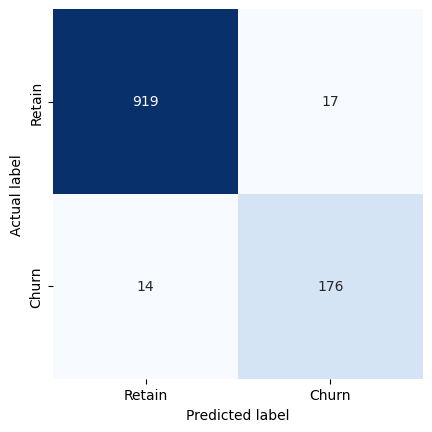

In [ ]:
ml_balance('SMOTE', SMOTE(random_state=42), 'rfc', RandomForestClassifier())

with SMOTE, Random Forest detected that:

- 14 customers are actually retained but predicted as churn
- 11 customers are actually churned but predicted as retain
- 94% sensitivity for class 1 (Churn) and 99% for class 0 (Retain)

**with RandomOverSampler (oversample)**

The test accuracy score is  0.9840142095914742
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.97      0.94      0.95       190

    accuracy                           0.98      1126
   macro avg       0.98      0.97      0.97      1126
weighted avg       0.98      0.98      0.98      1126



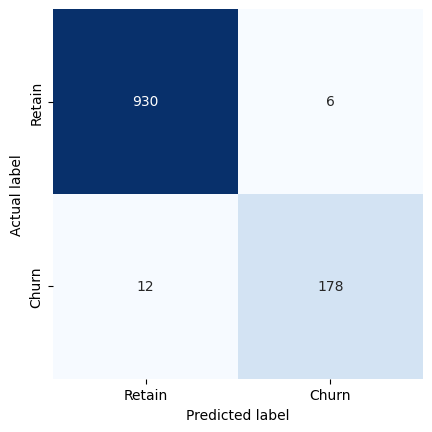

In [ ]:
ml_balance('Sampler', RandomOverSampler(random_state=42), 'rfc', RandomForestClassifier())

with RandomOverSampler, Random Forest detected that:

- 4 customers are actually retained but predicted as churn
- 5 customers are actually churned but predicted as retain
- 97% sensitivity for class 1 (Churn) and 100% for class 0 (Retain)

### Experiment with feature scaling

Actually, logistic Regression and MLP Classifier need standardization. However, since the model is not as robust as the other models i used (tree-based and boosting), I will not proceed to continue the treatment.

Tree-based and boosting algorithms also unaffected by different scale of numerical input. However, I want to try to normalize with MinMaxScaler just to observe things.  

In [ ]:
def ml_balance_scaled(sampler_title, sampler, model_title, model):
  estimators = [
    (sampler_title, sampler),
    ('scaler', preprocessing.MinMaxScaler()),
    (model_title, model)
    ]
  pipe = Pipeline(estimators)
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  print("The test accuracy score is ", accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred))
  conf = confusion_matrix(y_test, y_pred)
  labels = ['Retain', 'Churn']
  sns.heatmap(conf, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted label')
  plt.ylabel('Actual label')

The test accuracy score is  0.9174067495559503
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       936
           1       0.69      0.94      0.79       190

    accuracy                           0.92      1126
   macro avg       0.84      0.93      0.87      1126
weighted avg       0.94      0.92      0.92      1126



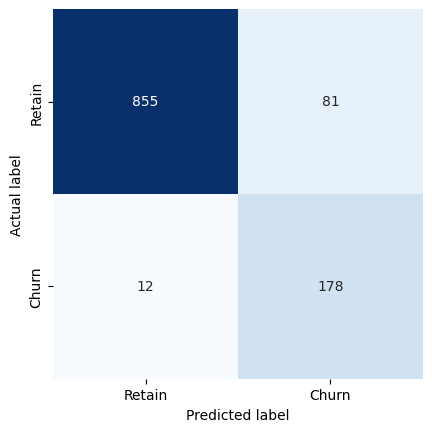

In [ ]:
ml_balance_scaled('smoteenn', SMOTEENN(random_state=42), 'xgb', XGBClassifier())

I tried with one algorithm, which is XGBoost, and feature scaling did not affect the results. It's because boosting algorithms did not affected by different scale of numerical inputs. Besides boosting algorithms, tree-based algorithms did not affected as well.

##**6. Modeling with Neural Network**

In [ ]:
import torch
import torch.nn as nn

In [ ]:
data_join.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
1787,9.0,0,3,16.0,1,1,2.0,3,0,1,2,2,0,14.0,8.0,9.0,7.0,199.80,0
2147,6.0,0,3,13.0,2,0,1.0,3,2,4,1,1,0,17.0,0.0,1.0,2.0,143.02,0
1717,8.0,1,1,15.0,2,1,3.0,4,2,4,2,10,0,19.0,0.0,1.0,0.0,165.40,0
2292,15.0,1,3,11.0,2,1,3.0,3,0,4,2,10,1,19.0,7.0,7.0,7.0,184.46,1
5578,12.0,0,1,13.0,2,1,4.0,5,2,3,1,4,0,12.0,3.0,8.0,8.0,178.21,0


In [ ]:
data_join.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4504 entries, 1787 to 5140
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       4504 non-null   float64
 1   PreferredLoginDevice         4504 non-null   int64  
 2   CityTier                     4504 non-null   int64  
 3   WarehouseToHome              4504 non-null   float64
 4   PreferredPaymentMode         4504 non-null   int64  
 5   Gender                       4504 non-null   int64  
 6   HourSpendOnApp               4504 non-null   float64
 7   NumberOfDeviceRegistered     4504 non-null   int64  
 8   PreferedOrderCat             4504 non-null   int64  
 9   SatisfactionScore            4504 non-null   int64  
 10  MaritalStatus                4504 non-null   int64  
 11  NumberOfAddress              4504 non-null   int64  
 12  Complain                     4504 non-null   int64  
 13  OrderAmountHikeFroml

**define X and y, then convert them to tensors**

In [ ]:
model = nn.Sequential()

# Define X and y
X = data_join.drop(['Churn'],axis=1)
y = data_join['Churn']

X_torch = torch.tensor(X.values, dtype=torch.float)
y_torch = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

**build the neural network**

In [ ]:
torch.manual_seed(42)

class NN_Churn(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(18, 60) # 18 = number of input layer -> number of columns in the dataframe
    self.act1 = nn.ReLU()
    self.layer2 = nn.Linear(60, 60)
    self.act2 = nn.ReLU()
    self.layer3 = nn.Linear(60, 60)
    self.act3 = nn.ReLU()
    self.layer4 = nn.Linear(60, 60)
    self.act4 = nn.ReLU()
    self.layer5 = nn.Linear(60, 60)
    self.act5 = nn.ReLU()
    self.output = nn.Linear(60, 1)
    self.sigmoid = nn.Sigmoid()
  def forward(self, x):
    x = self.act1(self.layer1(x))
    x = self.act2(self.layer2(x))
    x = self.act3(self.layer3(x))
    x = self.act3(self.layer4(x))
    x = self.act3(self.layer5(x))
    x = self.sigmoid(self.output(x))
    return x

model_nn = NN_Churn()

**train the neural network**

to train the neural network, I am going to make a training loop that will perform multiple optimizations to decrease the loss

In [ ]:
import torch.optim as optim

def BCELoss(p,y):
    if y == 1: #if the true classification is 1
        return -np.log(p)
    else: # if the true classification is 0
        return -np.log(1-p)

loss = nn.BCELoss()
optimizer = optim.SGD(model_nn.parameters(), lr=0.001)

In [ ]:
num_epochs = 1000
for epoch in range(num_epochs):
  predictions = model_nn(X_torch) # forward pass
  BCE = loss(predictions,y_torch) # compute loss
  BCE.backward() # compute gradients
  optimizer.step() # update weights and biases
  optimizer.zero_grad() # reset the gradients for the next iteration

  # keep track of the loss values during training
  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch + 1}/{num_epochs}], BCE Loss: {BCE.item()}')

Epoch [100/1000], BCE Loss: 0.43442389369010925
Epoch [200/1000], BCE Loss: 0.43129590153694153
Epoch [300/1000], BCE Loss: 0.4305824637413025
Epoch [400/1000], BCE Loss: 0.4300744831562042
Epoch [500/1000], BCE Loss: 0.4296113848686218
Epoch [600/1000], BCE Loss: 0.4291636049747467
Epoch [700/1000], BCE Loss: 0.42871928215026855
Epoch [800/1000], BCE Loss: 0.4282780587673187
Epoch [900/1000], BCE Loss: 0.42783504724502563
Epoch [1000/1000], BCE Loss: 0.42737939953804016


In [ ]:
torch.save(model_nn, 'model_churn.pth')

**testing & evaluating the neural network**

In [ ]:
loaded_model = torch.load('model_churn.pth')
loaded_model.eval()

NN_Churn(
  (layer1): Linear(in_features=18, out_features=60, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=60, out_features=60, bias=True)
  (act2): ReLU()
  (layer3): Linear(in_features=60, out_features=60, bias=True)
  (act3): ReLU()
  (layer4): Linear(in_features=60, out_features=60, bias=True)
  (act4): ReLU()
  (layer5): Linear(in_features=60, out_features=60, bias=True)
  (act5): ReLU()
  (output): Linear(in_features=60, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_torch, y_torch, test_size=0.25, random_state=42)

In [ ]:
# Apply SMOTEENN to balance the classes
ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# feature scaling
scaler = preprocessing.StandardScaler()
scaler.fit(X_resampled, y_resampled)
X_train_scaled = scaler.transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert resampled data to PyTorch tensors
X_train_scaled_tensor = torch.tensor(X_train_scaled, dtype=torch.float)
X_test_scaled_tensor = torch.tensor(X_test_scaled, dtype=torch.float)
y_resampled_tensor = torch.tensor(y_resampled, dtype=torch.float32).reshape(-1, 1)

The test accuracy score is  0.23978685612788633
              precision    recall  f1-score   support

         0.0       0.98      0.09      0.16       936
         1.0       0.18      0.99      0.31       190

    accuracy                           0.24      1126
   macro avg       0.58      0.54      0.23      1126
weighted avg       0.84      0.24      0.19      1126



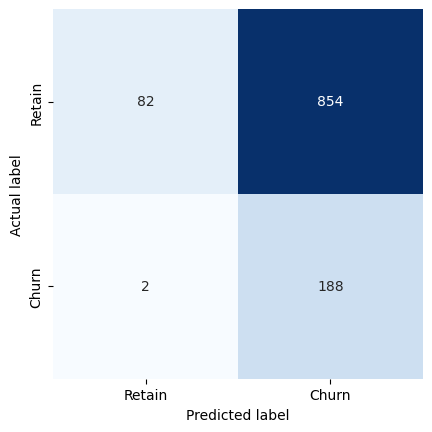

In [ ]:
# Function to convert probabilities to binary predictions
def binary_predictions(probabilities, threshold=0.5):
    predictions = (probabilities >= threshold).float()
    return predictions

# Make predictions on test data
with torch.no_grad():
    # Predict probabilities
    probabilities = loaded_model(X_test_scaled_tensor)
    # Convert probabilities to binary predictions
    y_pred = binary_predictions(probabilities)
    # Convert y_test to numpy array
    y_test_numpy = y_test.numpy().reshape(-1)
    # Compute and print accuracy score
    print("The test accuracy score is ", accuracy_score(y_test_numpy, y_pred))
    # Print classification report
    print(classification_report(y_test_numpy, y_pred))
    # Compute confusion matrix
    conf = confusion_matrix(y_test_numpy, y_pred)
    # Plot confusion matrix
    labels = ['Retain', 'Churn']
    sns.heatmap(conf, square=True, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show()

In [ ]:
destimators = [
    ('sampler', SMOTEENN(random_state=42)),
    ('scaler', preprocessing.MinMaxScaler()),
    ('model', model_nn)
    ]

pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

NameError: name 'estimators' is not defined

##**7. Model Evaluation with ROC AUC Curve**

In [ ]:
def check_auc_roc(sampler_title, sampler, model_title, model):
  estimators = [
    (sampler_title, sampler),
    (model_title, model)
    ]
  pipe = Pipeline(estimators)
  pipe.fit(X_train, y_train)
  y_pred_model = model.predict_proba(X_test)[:,1]
  auc_model = roc_auc_score(y_test, y_pred_model)
  print(f"AUC-ROC for {model}: {auc_model}")

In [ ]:
check_auc_roc('smoteenn', SMOTEENN(random_state=42), 'xgb', XGBClassifier())
check_auc_roc('smoteenn', SMOTEENN(random_state=42), 'rfc', RandomForestClassifier())

In [ ]:
import pickle

pklname = 'model_with_xgboost.pkl'

with open(pklname, 'wb') as file:
    pickle.dump(xgb,file)